## CH3. 신경론

#### 활성화 함수란?
입력 신호의 총합을 출력 신호로 변환하는 함수
활성화 함수는 임계값을 경계로 출력이 바뀜(= 계단 함수)

In [38]:
#계단 함수 구현

#1
def step_function(x):
    if x > 0 :
        return 1
    else:
        return 0
#문제점 발생 : 인수 x는 실수만 받아들임, 넘파이 배열을 인수로 넣을 수 없음

#2
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

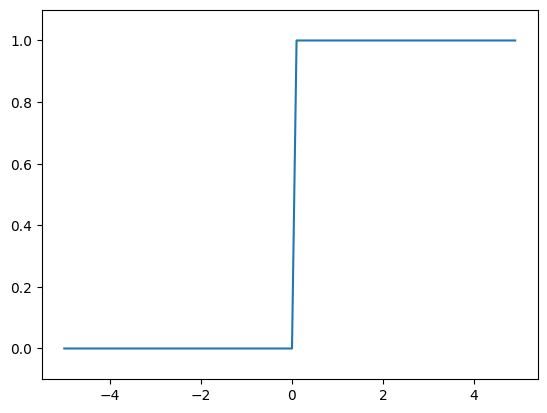

In [39]:
#계단 함수의 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

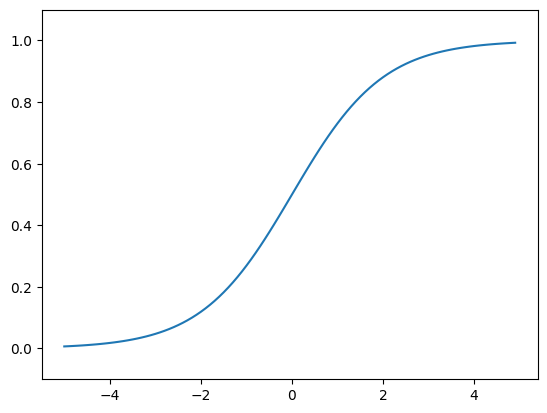

In [40]:
#시그모이드 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

(-0.1, 1.1)

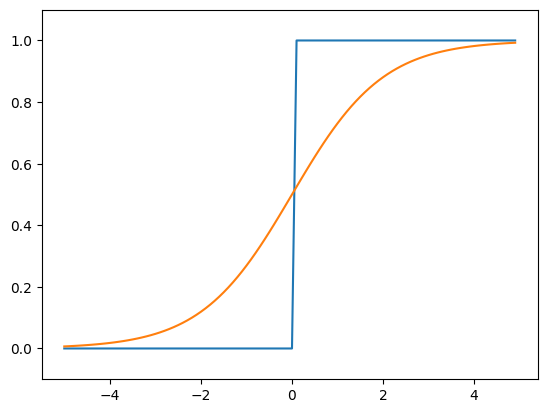

In [41]:
def step_function(x1):
    return np.array(x1 > 0, dtype=np.int32)

x1 = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x1)
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1)

def sigmoid(x2):
    return 1 / (1 + np.exp(-x2))

x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x2)
plt.plot(x2, y2)
plt.ylim(-0.1, 1.1)

#### 시그모이드 함수와 계단 함수 비교
**차이점**
- 매끄러움
시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화하는데 반해, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버림
시그모이드 함수의 매끈함은 신경망 학습에서 아주 중요한 역할을 함

- 출력값의 차이
게단 함수는 0과 1 중 하나의 값만 돌려주는 반면, 시그모이드 함수는 실수를 돌려줌

**공통점**
둘다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 1에 가까워지는 구조
입력이 중요하면 큰 값을 출력하고, 중요하지 않으면 작은 값을 출력

Relu 함수
입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

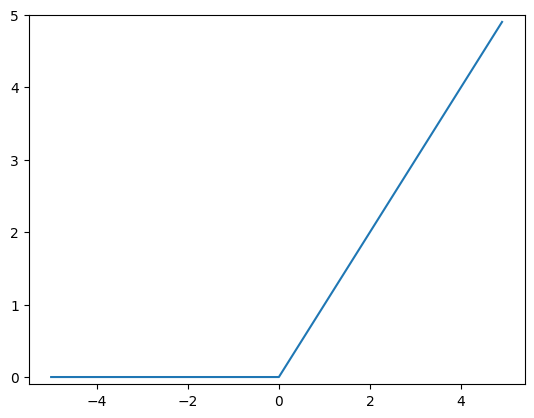

In [42]:
#Relu 구현
import numpy as np
import matplotlib.pylab as plt

def ReLU(x):
	return np.maximum(0, x)

x = np.arange(-5.0,5.0,0.1) # -5.0~ 5.0 +=0.1
y = ReLU(x)

plt.plot(x,y)
plt.ylim(-0.1,5.0) # y축 값 
plt.show()

#### 다차원 배열의 계산

In [43]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [44]:
np.ndim(A) #배열 차원 확인

1

In [45]:
A.shape #배열의 형상 확인

(4,)

In [46]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [47]:
np.ndim(B)

2

In [48]:
B.shape #3*2 형식의 배열임을 알 수 있음.

(3, 2)

행렬의 곱

In [49]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B) #A행렬과 B행렬을 곱함

array([[19, 22],
       [43, 50]])

In [50]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(B, A) #AB와 BA의 값 다름

array([[23, 34],
       [31, 46]])

행렬의 곱에서는 대응하는 차원의 원소 수를 일치시켜야 함</br>
![matrix](/workspaces/codespaces-jupyter/DeepLearnig/matrix.png)

In [51]:
A = np.array([[1, 2]])
B = np.array([[1, 2], [3, 4]])
np.dot(A, B) #

array([[ 7, 10]])

In [52]:
#신경망에서의 행렬의 곱
x = np.array([1, 2])
x.shape

w = np.array([[1, 3, 5], [2, 4, 6]])
y = np.dot(x, w)
print(y)

[ 5 11 17]


3층 신경망 구현하기

In [53]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)
print()
print(A1)
print(Z1)

(2, 3)
(2,)
(3,)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [54]:
#1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)
print()

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [55]:
#2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[0.31682708 0.69627909]


In [56]:
#구현 정리
def init_network(): #가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
    network = {} #각 층에 필요한 매개변수(가중치와 편향)을 저장함
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x): #입력 신호를 출력으로 변환하는 처리 과정을 모두 구현함
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


출력층 설계하기
</br>
항등 함수 : 입력을 그대로 출력함

소프트맥스 : 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합을 항상 1이 되는 특성을 가진 함수
#### 소프트맥스 함수 식
![Softmax function](/workspaces/codespaces-jupyter/DeepLearnig/softmax_function.gif)

In [57]:
#소프트맥스 함수 구현
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y